In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels import regression

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB

from category_encoders import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

import plotly.express as px

#### Loading datasets

In [2]:
sar_2018 = pd.read_csv('2018_NPS_SAR.csv')
visit_2018 = pd.read_csv('NPS_2018_Visitation.csv')

#### Checking to see the shape, loaded form, columns, information, etc.

In [3]:
sar_2018.shape

(165, 47)

In [4]:
sar_2018.head()

,__OBJECTID,Park,UNIT_CODE,LATITUDE,LONGITUDE,REGION,State,Total,Over_500,Outside_Park,...,NPS_Air_Operations_Costs,Military_Air_Operations_Costs,Other_Air_Operations_Costs,NPS_Vessel_Costs,Military_Vessel_Costs,Other_Vessel_Costs,Supplies_Other_Costs,Year,x,y
0,1,Olympic NP,OLYM,47.794600,-123.618300,PWR,WA,64.0,18.0,3.0,...,14385.57,365367.04,13762.0,0.0,0.0,0.0,4169.13,2018,-123.618345,47.794566
1,2,Acadia NP,ACAD,44.350700,-68.244100,NER,ME,37.0,5.0,0.0,...,0.00,0.00,0.0,50.0,0.0,0.0,167.11,2018,-68.244110,44.350732
2,3,Agate Fossil Beds NM,AGFO,42.421500,-103.744000,MWR,NE,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,2018,-103.743999,42.421472
3,4,All Fish and Wildlife,NCRO,38.876403,-77.033566,NCR,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,-77.033566,38.876403
4,5,Allegheny Portage Railroad NHS,ALPO,40.446800,-78.531900,NER,PA,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,2018,-78.531861,40.446771


In [5]:
sar_2018.columns

Index(['__OBJECTID', 'Park', 'UNIT_CODE', 'LATITUDE', 'LONGITUDE', 'REGION',
       'State', 'Total', 'Over_500', 'Outside_Park', 'Fatality',
       'Ill_or_Injured', 'Not_Ill_or_Injured', 'Unfounded', 'Save', 'Lake',
       'Land', 'Ocean', 'River', '00_12_Years_Old', '13_19_Years_Old',
       '20_29_Years_Old', '30_39_Years_Old', '40_49_Years_Old',
       '50_59_Years_Old', 'Over_60_Years_Old', 'Unknown_AGE', 'AGE_Animal',
       'Male', 'Female', 'Unknown_SEX', 'NPS_Programmed_Hours',
       'NPS_Non_Programmed_Hours', 'Non_NPS_Hours', 'NPS_Programmed_Dollars',
       'NPS_Non_Programmed_Dollars', 'Non_NPS_Dollars',
       'NPS_Air_Operations_Costs', 'Military_Air_Operations_Costs',
       'Other_Air_Operations_Costs', 'NPS_Vessel_Costs',
       'Military_Vessel_Costs', 'Other_Vessel_Costs', 'Supplies_Other_Costs',
       'Year', 'x', 'y'],
      dtype='object')

In [6]:
sar_2018.describe()

,__OBJECTID,LATITUDE,LONGITUDE,Total,Over_500,Outside_Park,Fatality,Ill_or_Injured,Not_Ill_or_Injured,Unfounded,...,NPS_Air_Operations_Costs,Military_Air_Operations_Costs,Other_Air_Operations_Costs,NPS_Vessel_Costs,Military_Vessel_Costs,Other_Vessel_Costs,Supplies_Other_Costs,Year,x,y
count,165.000000,165.000000,165.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,162.000000,162.000000,162.000000,162.000000,162.0,162.000000,162.000000,165.0,165.000000,165.000000
mean,83.654545,37.980539,-95.339279,16.603659,4.414634,1.237805,0.920732,8.975610,11.079268,0.792683,...,5439.533827,3077.528025,1484.129938,233.657901,0.0,334.635802,1458.088148,2018.0,-95.339417,37.980011
std,48.169120,6.838274,18.406696,35.583587,17.772558,3.955059,2.048446,26.200958,24.032183,2.200044,...,34528.499210,29569.049126,11111.167489,1116.513697,0.0,3922.362838,6695.546024,0.0,18.406858,6.838381
min,1.000000,18.342800,-155.602900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2018.0,-155.602855,18.342800
25%,42.000000,34.460500,-108.346400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2018.0,-108.346398,34.460494
50%,84.000000,37.583900,-91.196000,3.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2018.0,-91.196026,37.583900
75%,125.000000,40.767800,-80.210200,15.000000,1.000000,1.000000,1.000000,5.000000,11.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,164.597500,2018.0,-80.210247,40.767804
max,166.000000,63.341100,-64.741900,265.000000,192.000000,34.000000,13.000000,239.000000,164.000000,17.000000,...,310561.000000,365367.040000,124608.000000,10000.000000,0.0,49896.000000,71388.380000,2018.0,-64.741900,63.341100


In [7]:
sar_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   __OBJECTID                     165 non-null    int64  
 1   Park                           165 non-null    object 
 2   UNIT_CODE                      165 non-null    object 
 3   LATITUDE                       165 non-null    float64
 4   LONGITUDE                      165 non-null    float64
 5   REGION                         165 non-null    object 
 6   State                          165 non-null    object 
 7   Total                          164 non-null    float64
 8   Over_500                       164 non-null    float64
 9   Outside_Park                   164 non-null    float64
 10  Fatality                       164 non-null    float64
 11  Ill_or_Injured                 164 non-null    float64
 12  Not_Ill_or_Injured             164 non-null    flo

#### Changing columns to same format for easier referencing

In [8]:
sar_2018.columns = sar_2018.columns.str.lower()

#### Chart the fatalities

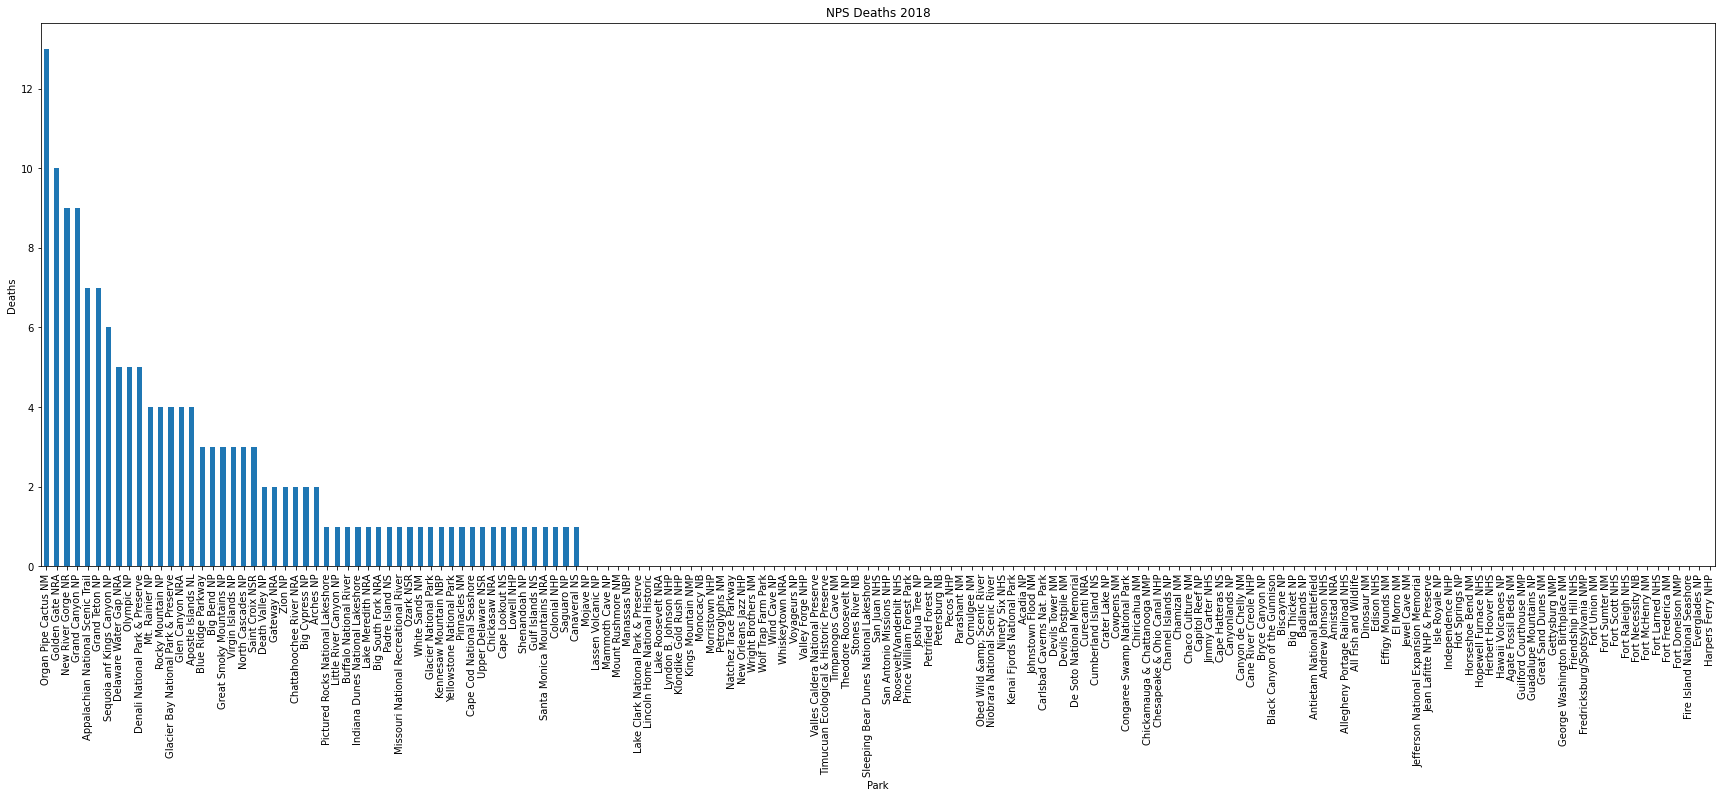

In [9]:
sar_2018.groupby('park')['fatality'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                figsize = (30,10),
                                                                                xlabel = 'Park',
                                                                              ylabel = 'Deaths',
                                                                              title = 'NPS Deaths 2018');

#### We have lots of NPS locations with zero. Think we can filter these out and look at just ones with fatalities?

In [10]:
sar_2018_fatal_only = sar_2018[sar_2018['fatality'] > 0]

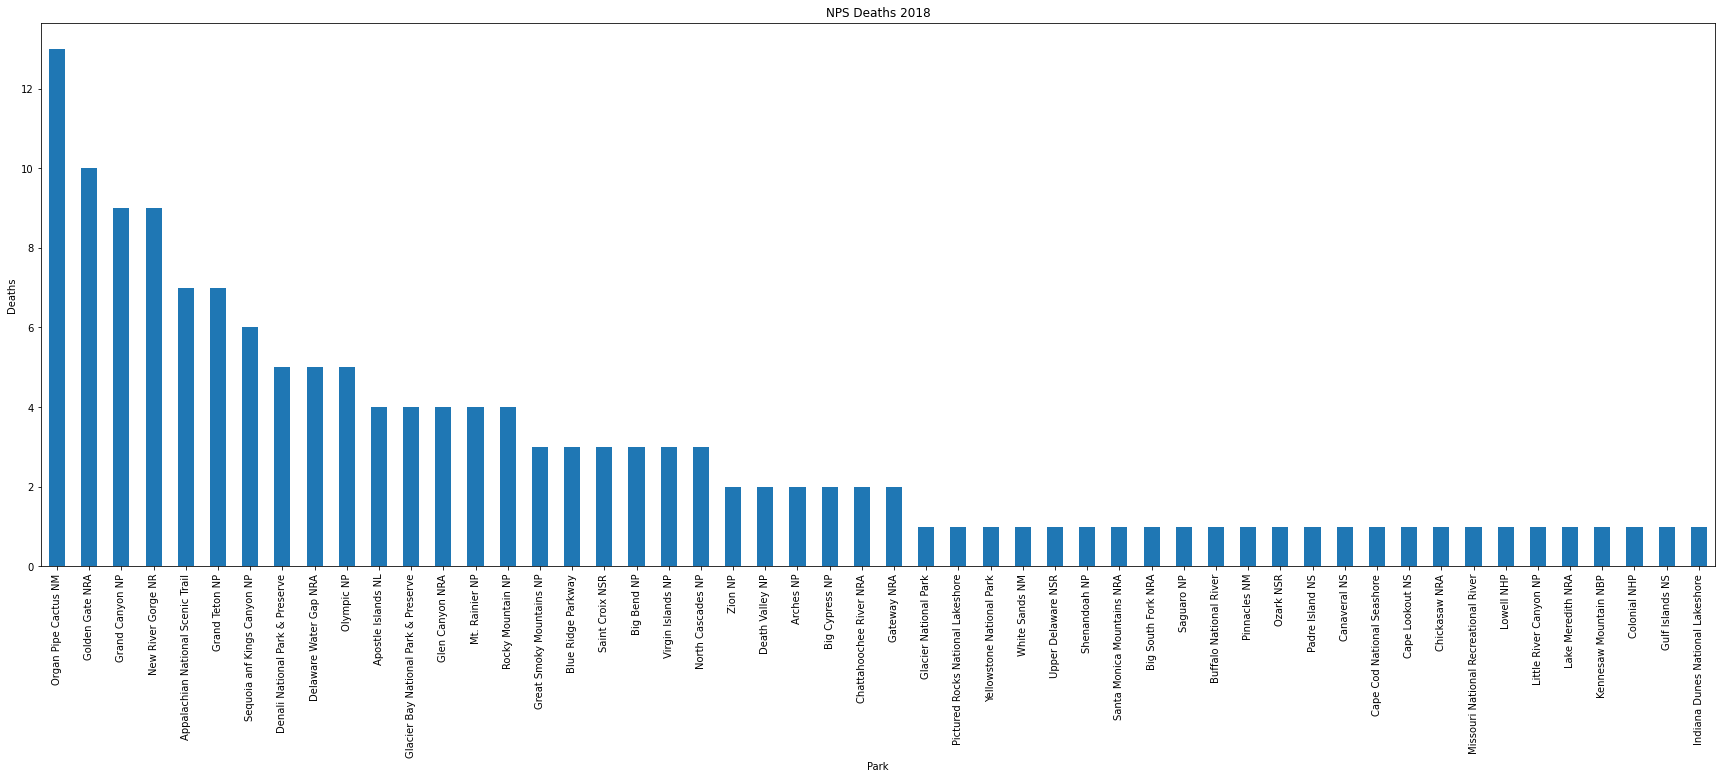

In [11]:
sar_2018_fatal_only.groupby('park')['fatality'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                figsize = (30,10),
                                                                                xlabel = 'Park',
                                                                              ylabel = 'Deaths',
                                                                              title = 'NPS Deaths 2018');

#### This would be really interesting to see visitors - death ratio. Let's join on the original dataset.

First, check out the visitor dataframe.

In [12]:
visit_2018.shape

(383, 12)

In [13]:
visit_2018.head()

,Park Name,Recreational Visits,Non-Recreational Visits,Recreational Hours,Non-Recreational Hours,Concessioner Lodging,Concessioner Camping,Tent Overnights,RV Overnights,Backcountry Overnights,Non-recreational Overnights,Misc. Overnights
0,Abraham Lincoln Birthplace NHP,"260,964",0,"260,964",0,0,0,0,0,0,0,0
1,Acadia NP,"3,537,575","47,100","23,613,754","47,100",0,"1,364","144,744","58,215","1,472",0,"11,698"
2,Adams NHP,"121,007",495,"120,485",248,0,0,0,0,0,0,0
3,African Burial Ground NM,"45,035",0,"32,537",0,0,0,0,0,0,0,0
4,Agate Fossil Beds NM,"16,238",0,"38,884",0,0,0,0,0,0,0,0


#### But first, we have some cleaning to do...

In [14]:
visit_2018.columns

Index(['Park Name', 'Recreational Visits', 'Non-Recreational Visits',
       'Recreational Hours', 'Non-Recreational Hours', 'Concessioner Lodging',
       'Concessioner Camping', 'Tent Overnights', 'RV Overnights',
       'Backcountry Overnights', 'Non-recreational Overnights',
       'Misc. Overnights'],
      dtype='object')

In [15]:
visit_2018.columns = visit_2018.columns.str.lower()

In [18]:
visit_2018.dropna(inplace=True)

In [21]:
visit_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 382
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   park name                    379 non-null    object
 1   recreational visits          379 non-null    int64 
 2   non-recreational visits      379 non-null    object
 3   recreational hours           379 non-null    object
 4   non-recreational hours       379 non-null    object
 5   concessioner lodging         379 non-null    object
 6   concessioner camping         379 non-null    object
 7   tent overnights              379 non-null    object
 8   rv overnights                379 non-null    object
 9   backcountry overnights       379 non-null    object
 10  non-recreational overnights  379 non-null    object
 11  misc. overnights             379 non-null    object
dtypes: int64(1), object(11)
memory usage: 38.5+ KB


In [20]:
visit_2018['recreational visits'] = visit_2018['recreational visits'].str.split(',').str.join('').astype('int')

In [23]:
visit_2018['non-recreational visits'] = visit_2018['non-recreational visits'].str.split(',').str.join('').astype('int')

In [24]:
visit_2018['total_visits'] = visit_2018['recreational visits'] + visit_2018['non-recreational visits']

#### Now we are free to merge the two!

In [28]:
df_combined = sar_2018.merge(visit_2018, how = 'left', right_on = 'park name', left_on = 'park')

In [29]:
df_combined.columns

Index(['__objectid', 'park', 'unit_code', 'latitude', 'longitude', 'region',
       'state', 'total', 'over_500', 'outside_park', 'fatality',
       'ill_or_injured', 'not_ill_or_injured', 'unfounded', 'save', 'lake',
       'land', 'ocean', 'river', '00_12_years_old', '13_19_years_old',
       '20_29_years_old', '30_39_years_old', '40_49_years_old',
       '50_59_years_old', 'over_60_years_old', 'unknown_age', 'age_animal',
       'male', 'female', 'unknown_sex', 'nps_programmed_hours',
       'nps_non_programmed_hours', 'non_nps_hours', 'nps_programmed_dollars',
       'nps_non_programmed_dollars', 'non_nps_dollars',
       'nps_air_operations_costs', 'military_air_operations_costs',
       'other_air_operations_costs', 'nps_vessel_costs',
       'military_vessel_costs', 'other_vessel_costs', 'supplies_other_costs',
       'year', 'x', 'y', 'park name', 'recreational visits',
       'non-recreational visits', 'recreational hours',
       'non-recreational hours', 'concessioner lodgin

#### Now we look at the * Death Ratio *

In [31]:
df_combined['death ratio'] = df_combined['fatality'] / df_combined['total_visits']

In [35]:
df_combined.groupby('park')['death ratio'].sum().sort_values(ascending = False)

park
North Cascades NP       0.000100
Apostle Islands NL      0.000016
Virgin Islands NP       0.000010
Organ Pipe Cactus NM    0.000009
Big Bend NP             0.000007
                          ...   
Fort McHenry NM         0.000000
Fort Necessity NB       0.000000
Fort Raleigh NHS        0.000000
Fort Scott NHS          0.000000
Harpers Ferry NHP       0.000000
Name: death ratio, Length: 161, dtype: float64

#### Filter out zero deaths from the dataframe.

In [36]:
df_combined_fatal_only = df_combined[df_combined['fatality'] > 0]

In [37]:
df_combined_fatal_only.groupby('park')['death ratio'].sum().sort_values(ascending = False)

park
North Cascades NP                       9.971747e-05
Apostle Islands NL                      1.576665e-05
Virgin Islands NP                       9.612119e-06
Organ Pipe Cactus NM                    8.997505e-06
Big Bend NP                             6.780351e-06
Saint Croix NSR                         4.139964e-06
Cape Lookout NS                         2.420141e-06
Lowell NHP                              1.962666e-06
Padre Island NS                         1.618560e-06
Delaware Water Gap NRA                  1.507877e-06
Grand Canyon NP                         1.405318e-06
Grand Teton NP                          1.370125e-06
Olympic NP                              1.304371e-06
Arches NP                               1.202243e-06
Death Valley NP                         1.146220e-06
Santa Monica Mountains NRA              9.950288e-07
Glen Canyon NRA                         9.407586e-07
Lake Meredith NRA                       9.039687e-07
Rocky Mountain NP                       8

#### Charting this.

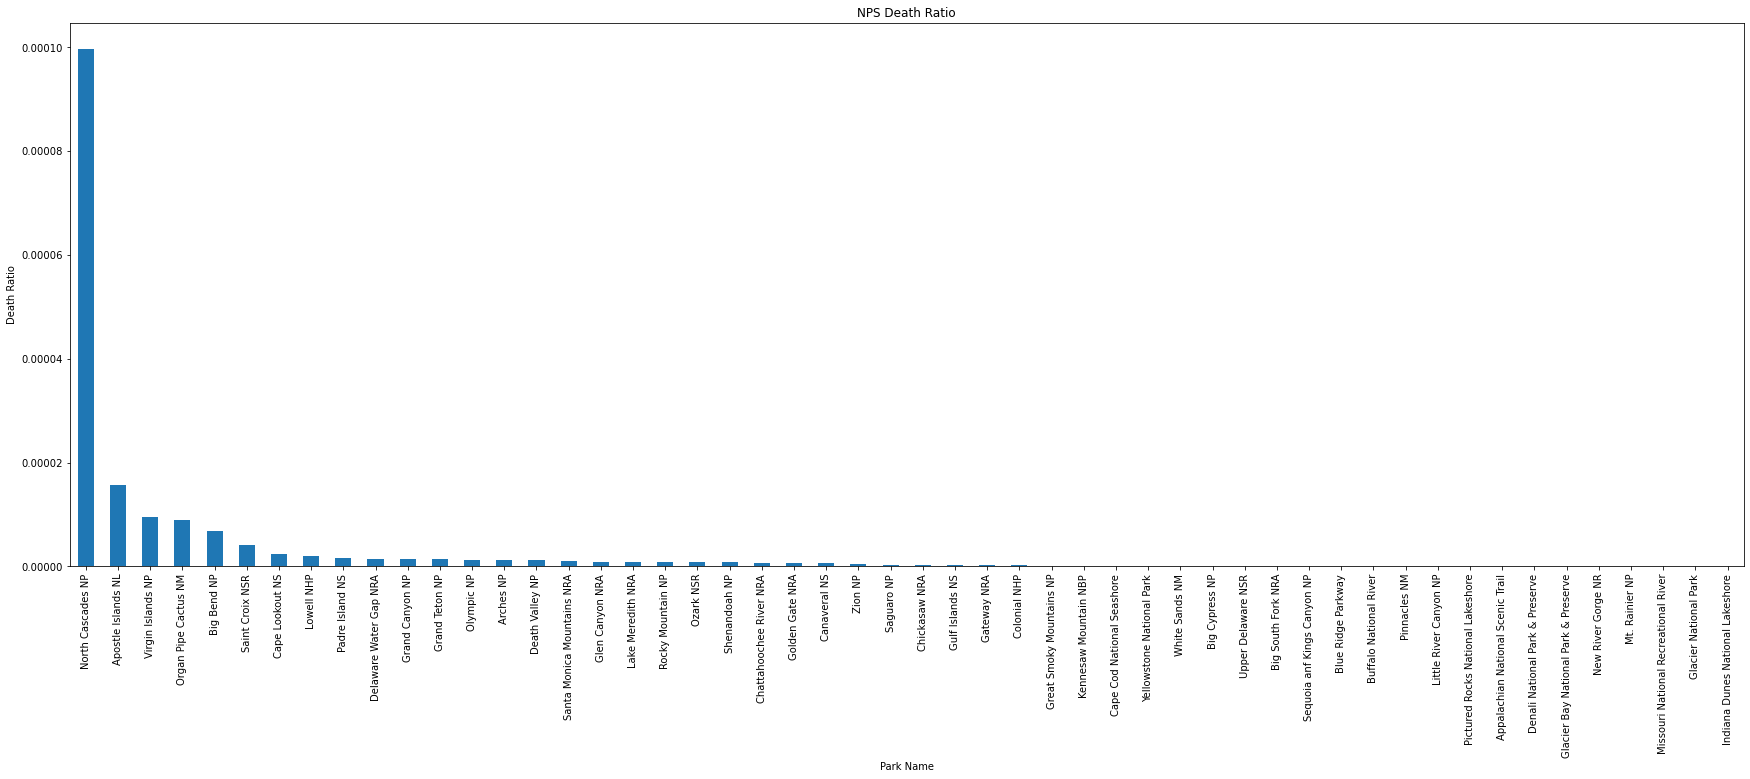

In [39]:
df_combined_fatal_only.groupby('park')['death ratio'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                               xlabel = 'Park Name',
                                                                                               ylabel = 'Death Ratio',
                                                                                               title = 'NPS Death Ratio',
                                                                                               figsize = (30,10));

#### Whoa! So North Cascades has the highest death-to-visitor ratio. Where exactly is this place?

In [43]:
df_combined[df_combined['park'] == 'North Cascades NP']['state']

117    WA
Name: state, dtype: object

#### Which park has had the highest visitors? 

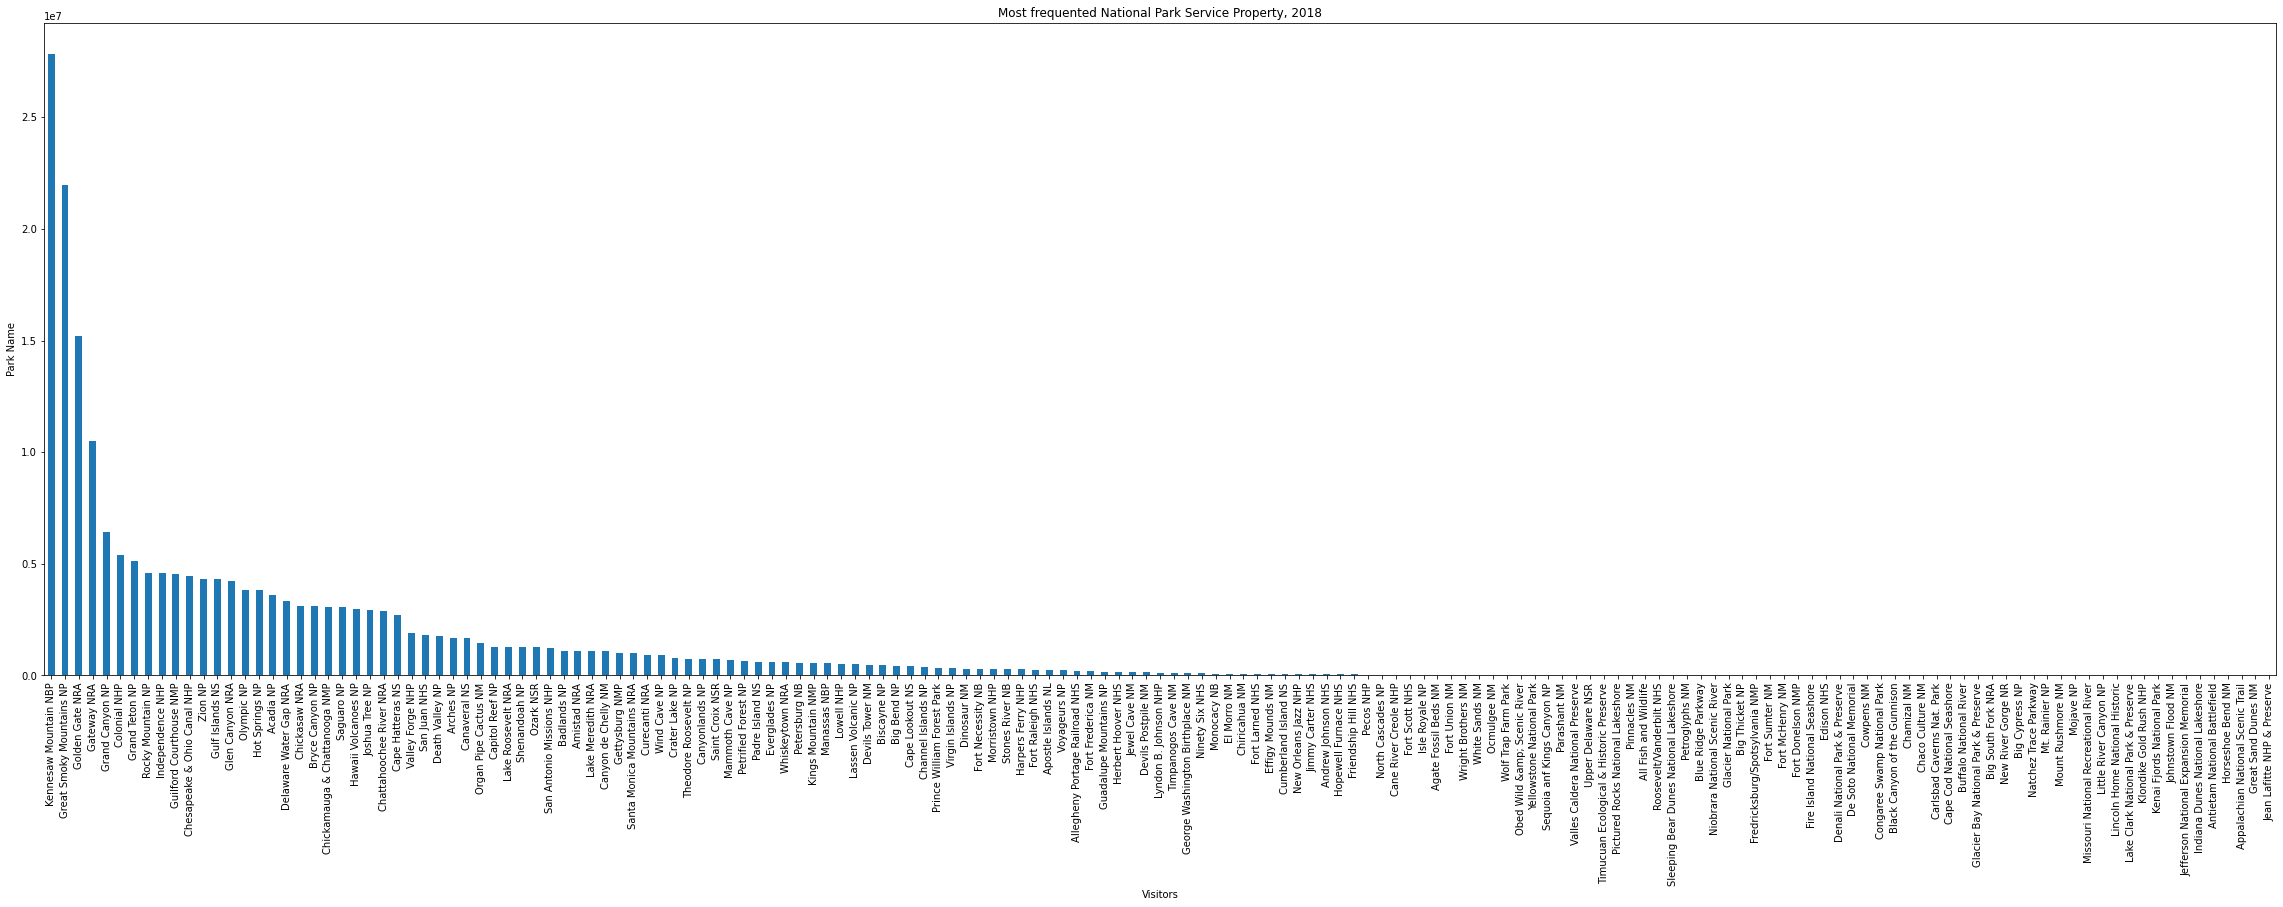

In [193]:
df_combined.groupby('park')['total_visits'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                     figsize = (40,12),
                                                                                     xlabel = 'Visitors',
                                                                                     ylabel = 'Park Name',
                                                                                     title = 'Most frequented National Park Service Property, 2018');

#### Looking at distribution of fatalities

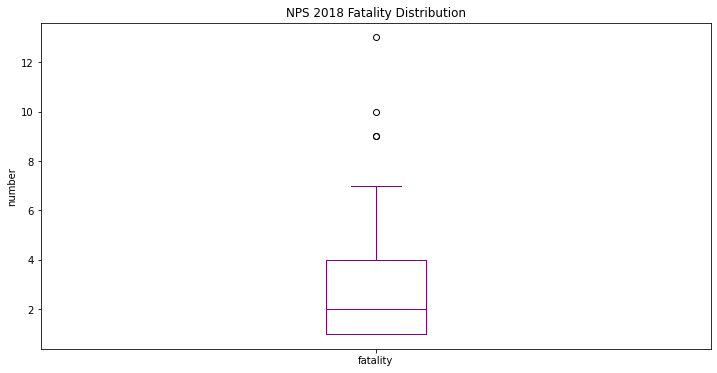

In [215]:
df_combined_fatal_only['fatality'].plot(kind = 'box',
                                       ylabel = 'number',
                                       title = 'NPS 2018 Fatality Distribution', 
                                       figsize = (12,6),
                                       color = 'purple');

#### Looking at distribution of total Search and Rescues

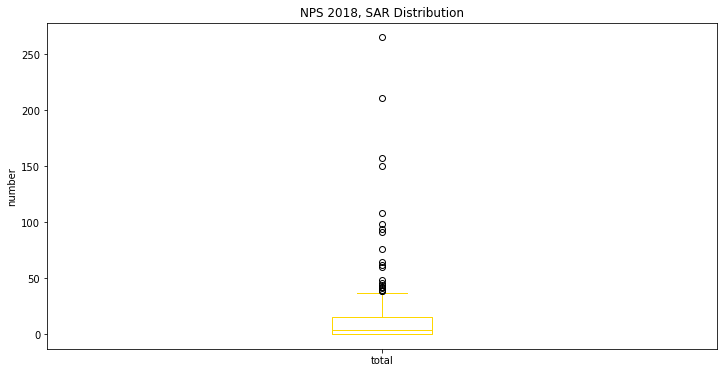

In [222]:
df_combined['total'].plot(kind = 'box',
                         ylabel = 'number',
                         figsize = (12,6),
                          title = 'NPS 2018, SAR Distribution',
                         color = 'gold');

#### Let's look at the male-female fatalities across all NPS parks.

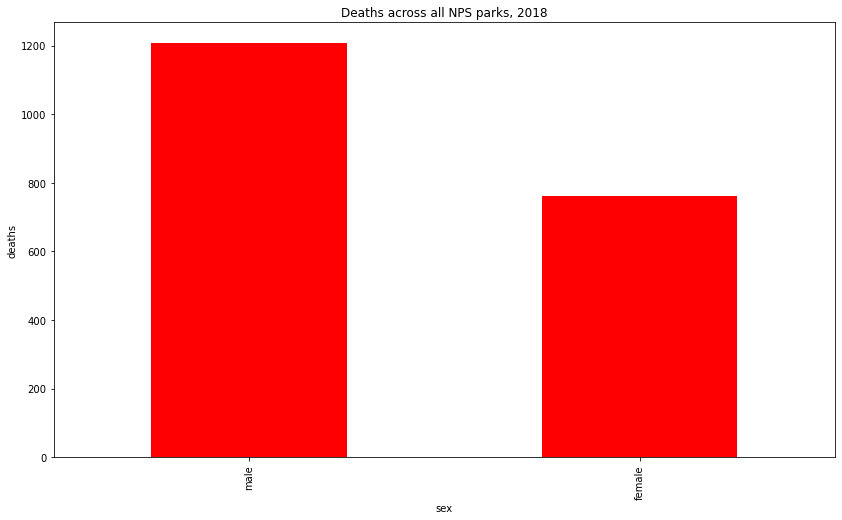

In [49]:
df_combined_fatal_only[['male', 'female']].sum().plot(kind = 'bar',
                                                     xlabel='sex',
                                                     ylabel = 'deaths',
                                                     title = 'Deaths across all NPS parks, 2018',
                                                     figsize=(14,8),
                                                     color = 'red');

#### Anything else we can explore? 

In [64]:
df_combined.columns

Index(['__objectid', 'park', 'unit_code', 'latitude', 'longitude', 'region',
       'state', 'total', 'over_500', 'outside_park', 'fatality',
       'ill_or_injured', 'not_ill_or_injured', 'unfounded', 'save', 'lake',
       'land', 'ocean', 'river', '00_12_years_old', '13_19_years_old',
       '20_29_years_old', '30_39_years_old', '40_49_years_old',
       '50_59_years_old', 'over_60_years_old', 'unknown_age', 'age_animal',
       'male', 'female', 'unknown_sex', 'nps_programmed_hours',
       'nps_non_programmed_hours', 'non_nps_hours', 'nps_programmed_dollars',
       'nps_non_programmed_dollars', 'non_nps_dollars',
       'nps_air_operations_costs', 'military_air_operations_costs',
       'other_air_operations_costs', 'nps_vessel_costs',
       'military_vessel_costs', 'other_vessel_costs', 'supplies_other_costs',
       'year', 'x', 'y', 'park name', 'recreational visits',
       'non-recreational visits', 'recreational hours',
       'non-recreational hours', 'concessioner lodgin

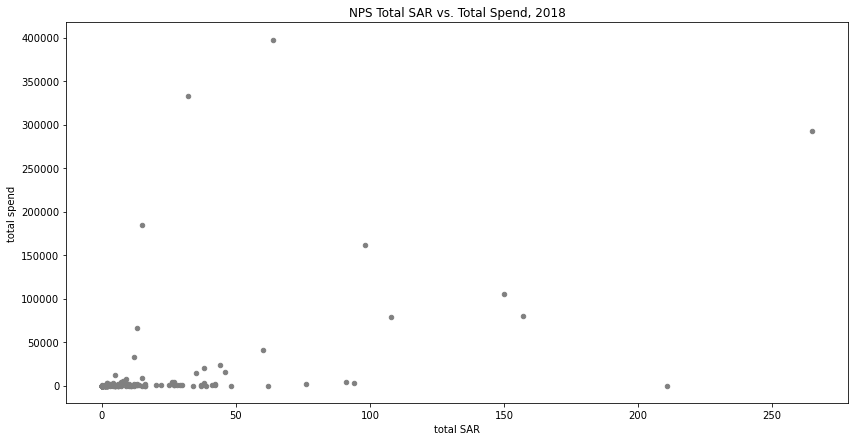

In [125]:
df_combined.plot(kind = 'scatter',
                x = 'total',
                y = 'total_costs',
                xlabel = 'total SAR',
                ylabel = 'total spend',
                title = 'NPS Total SAR vs. Total Spend, 2018',
                figsize = (14,7),
                color = 'grey');

<AxesSubplot:>

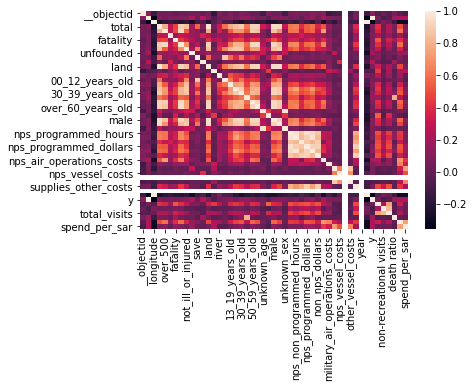

In [129]:
sns.heatmap(df_combined.corr())

#### Recreational hours -- what about fatalities per recreational hour? Which park has the longest interval and shortest? 

In [131]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   __objectid                     165 non-null    int64  
 1   park                           165 non-null    object 
 2   unit_code                      165 non-null    object 
 3   latitude                       165 non-null    float64
 4   longitude                      165 non-null    float64
 5   region                         165 non-null    object 
 6   state                          165 non-null    object 
 7   total                          164 non-null    float64
 8   over_500                       164 non-null    float64
 9   outside_park                   164 non-null    float64
 10  fatality                       164 non-null    float64
 11  ill_or_injured                 164 non-null    float64
 12  not_ill_or_injured             164 non-null    flo

#### Replacing all NaNs with zeroes. Then removing all commas to change type to float.

In [161]:
df_combined['recreational hours'].replace(np.nan, 0, inplace=True)

In [162]:
df_combined['recreational hours'] = df_combined['recreational hours'].str.split(',').str.join('').astype('float')

AttributeError: Can only use .str accessor with string values!

#### Creating Deaths Per Hour column

In [223]:
df_combined['deaths_per_hour'] = df_combined['fatality'] / df_combined['recreational hours']

#### Replacing all inf with zeroes

In [224]:
df_combined['deaths_per_hour'].replace(np.inf, 0, inplace=True)

#### Creating a new DF filtered where deaths per hour> 0 

In [225]:
df_combined_deaths_per_hr = df_combined[df_combined['deaths_per_hour'] > 0.0]

In [226]:
df_combined_deaths_per_hr.shape

(32, 64)

In [227]:
df_combined_deaths_per_hr['deaths_per_hour'].value_counts()

2.845043e-07    1
4.838163e-06    1
6.685860e-08    1
9.702932e-08    1
6.403889e-07    1
4.439694e-07    1
9.846862e-07    1
1.274701e-07    1
2.317948e-07    1
2.960352e-07    1
1.676900e-05    1
4.865580e-06    1
1.302577e-06    1
3.103443e-07    1
2.552904e-07    1
7.656440e-08    1
3.586057e-08    1
3.650344e-07    1
8.954621e-08    1
2.488969e-07    1
8.874502e-08    1
7.816100e-08    1
3.574346e-07    1
1.701651e-07    1
2.907038e-07    1
1.467085e-07    1
1.739817e-07    1
5.621565e-07    1
2.377348e-07    1
2.897550e-07    1
3.385894e-07    1
4.344250e-06    1
Name: deaths_per_hour, dtype: int64

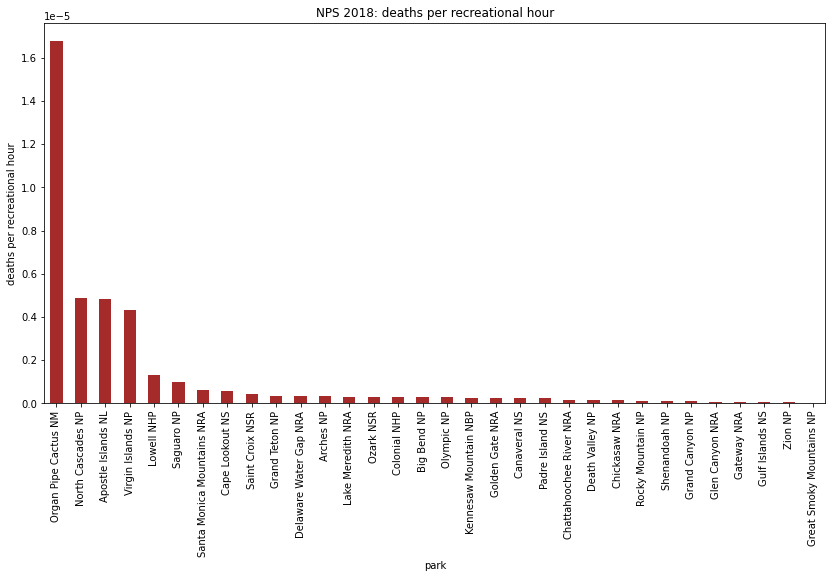

In [228]:
df_combined_deaths_per_hr.groupby('park')['deaths_per_hour'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                                      xlabel = 'park',
                                                                                                      ylabel = 'deaths per recreational hour',
                                                                                                      title = 'NPS 2018: deaths per recreational hour',
                                                                                                      figsize = (14,7),
                                                                                                      color = 'brown');

Great Smoky Mountains NP has the most frequent deaths per recreational hour — makes sense given that the Smokies are the most visited.

#### Costs? Let's see which park spent the most on Search and Rescue

In [71]:
df_combined[['nps_air_operations_costs', 'military_air_operations_costs', 
             'other_air_operations_costs', 'nps_vessel_costs', 
             'military_vessel_costs', 'other_vessel_costs', 
             'supplies_other_costs']].sum()

nps_air_operations_costs         881204.48
military_air_operations_costs    498559.54
other_air_operations_costs       240429.05
nps_vessel_costs                  37852.58
military_vessel_costs                 0.00
other_vessel_costs                54211.00
supplies_other_costs             236210.28
dtype: float64

#### We should add these costs up and put it into a new column. Then plot it.

In [73]:
df_combined['total_costs'] = df_combined['nps_air_operations_costs'] + df_combined['military_air_operations_costs'] + df_combined['other_air_operations_costs'] + df_combined['nps_vessel_costs'] + df_combined['military_vessel_costs'] + df_combined['other_vessel_costs'] + df_combined['supplies_other_costs']

#### We will remove any NPS properties that have not spent any on SAR

In [77]:
df_combined_cost_only = df_combined[df_combined['total_costs'] > 0]

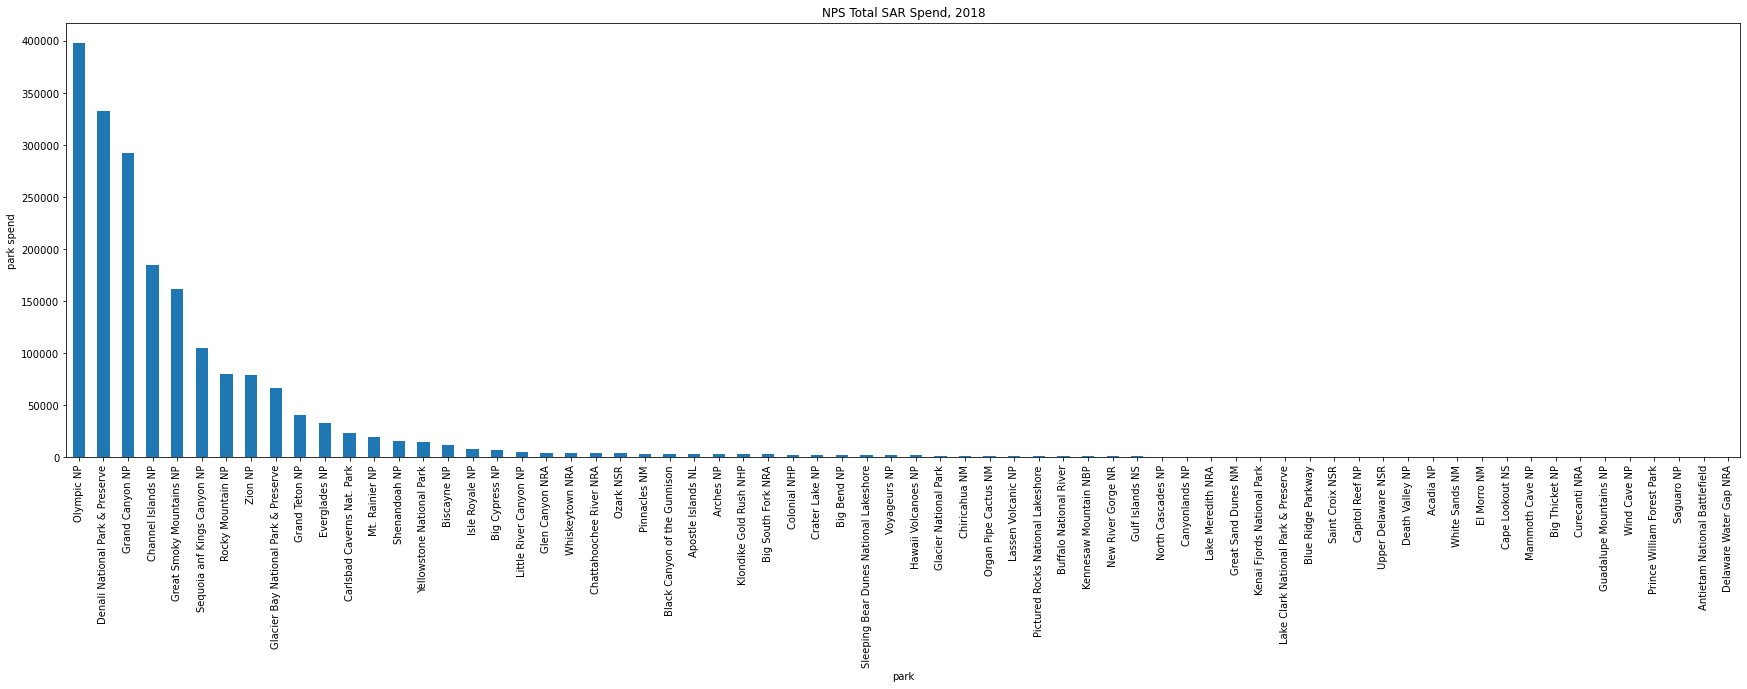

In [80]:
df_combined_cost_only.groupby('park')['total_costs'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                              xlabel = 'park',
                                                                                              ylabel = 'park spend',
                                                                                              title = 'NPS Total SAR Spend, 2018',
                                                                                              figsize = (30,8));

#### Okay, so we can see that Olympic NP spends the most on SAR. Meanwhile North Cascades NP, seemingly the most likely place where visitors will die is not even on the list.

Let's check out the spend per SAR for each park. 

In [81]:
df_combined.columns

Index(['__objectid', 'park', 'unit_code', 'latitude', 'longitude', 'region',
       'state', 'total', 'over_500', 'outside_park', 'fatality',
       'ill_or_injured', 'not_ill_or_injured', 'unfounded', 'save', 'lake',
       'land', 'ocean', 'river', '00_12_years_old', '13_19_years_old',
       '20_29_years_old', '30_39_years_old', '40_49_years_old',
       '50_59_years_old', 'over_60_years_old', 'unknown_age', 'age_animal',
       'male', 'female', 'unknown_sex', 'nps_programmed_hours',
       'nps_non_programmed_hours', 'non_nps_hours', 'nps_programmed_dollars',
       'nps_non_programmed_dollars', 'non_nps_dollars',
       'nps_air_operations_costs', 'military_air_operations_costs',
       'other_air_operations_costs', 'nps_vessel_costs',
       'military_vessel_costs', 'other_vessel_costs', 'supplies_other_costs',
       'year', 'x', 'y', 'park name', 'recreational visits',
       'non-recreational visits', 'recreational hours',
       'non-recreational hours', 'concessioner lodgin

In [83]:
df_combined['spend_per_sar'] = df_combined['total_costs']/df_combined['total']

#### Now that's done, let's create a new DF to see the spend per search and rescue for parks that spend more than $0

In [84]:
df_combined_spend_sar = df_combined[df_combined['spend_per_sar'] > 0]

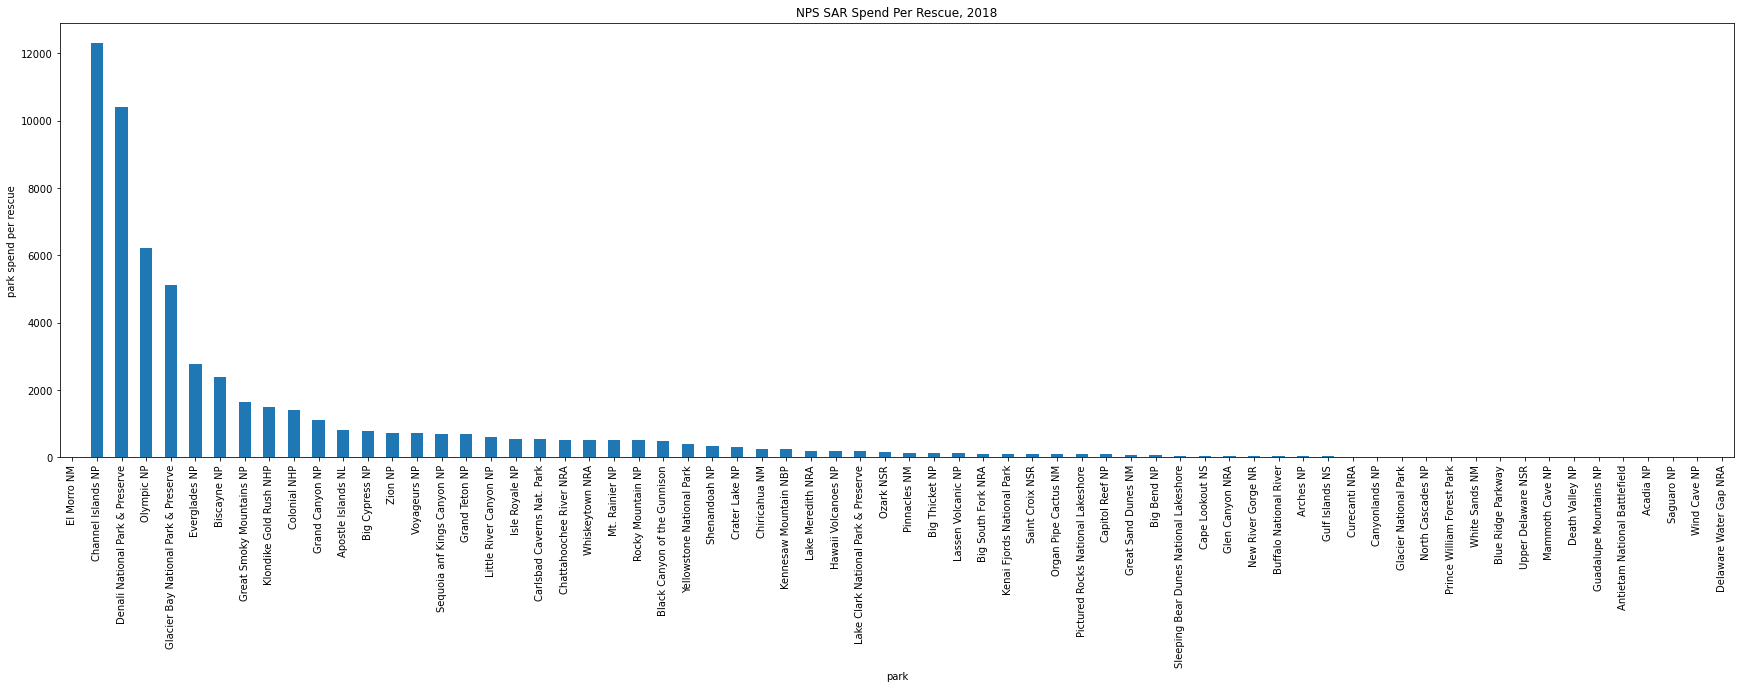

In [85]:
df_combined_spend_sar.groupby('park')['spend_per_sar'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                              xlabel = 'park',
                                                                                              ylabel = 'park spend per rescue',
                                                                                              title = 'NPS SAR Spend Per Rescue, 2018',
                                                                                              figsize = (30,8));

#### El Morro looks like an anomaly.

In [86]:
df_combined_spend_sar[df_combined_spend_sar['park'] == 'El Morro NM']

,__objectid,park,unit_code,latitude,longitude,region,state,total,over_500,outside_park,...,concessioner camping,tent overnights,rv overnights,backcountry overnights,non-recreational overnights,misc. overnights,total_visits,death ratio,total_costs,spend_per_sar
50,51,El Morro NM,ELMO,35.039,-108.3464,IMR,NM,0.0,0.0,0.0,...,0,"2,538","1,786",0,0,0,79072.0,0.0,199.5,inf


Spend Per SAR is infinity. We should correct / drop this. 

In [92]:
df_combined['spend_per_sar'] = df_combined['spend_per_sar'].replace(np.inf, 0)

In [93]:
df_combined_spend_sar = df_combined[df_combined['spend_per_sar'] > 0]

#### Now let's re-run the plot.

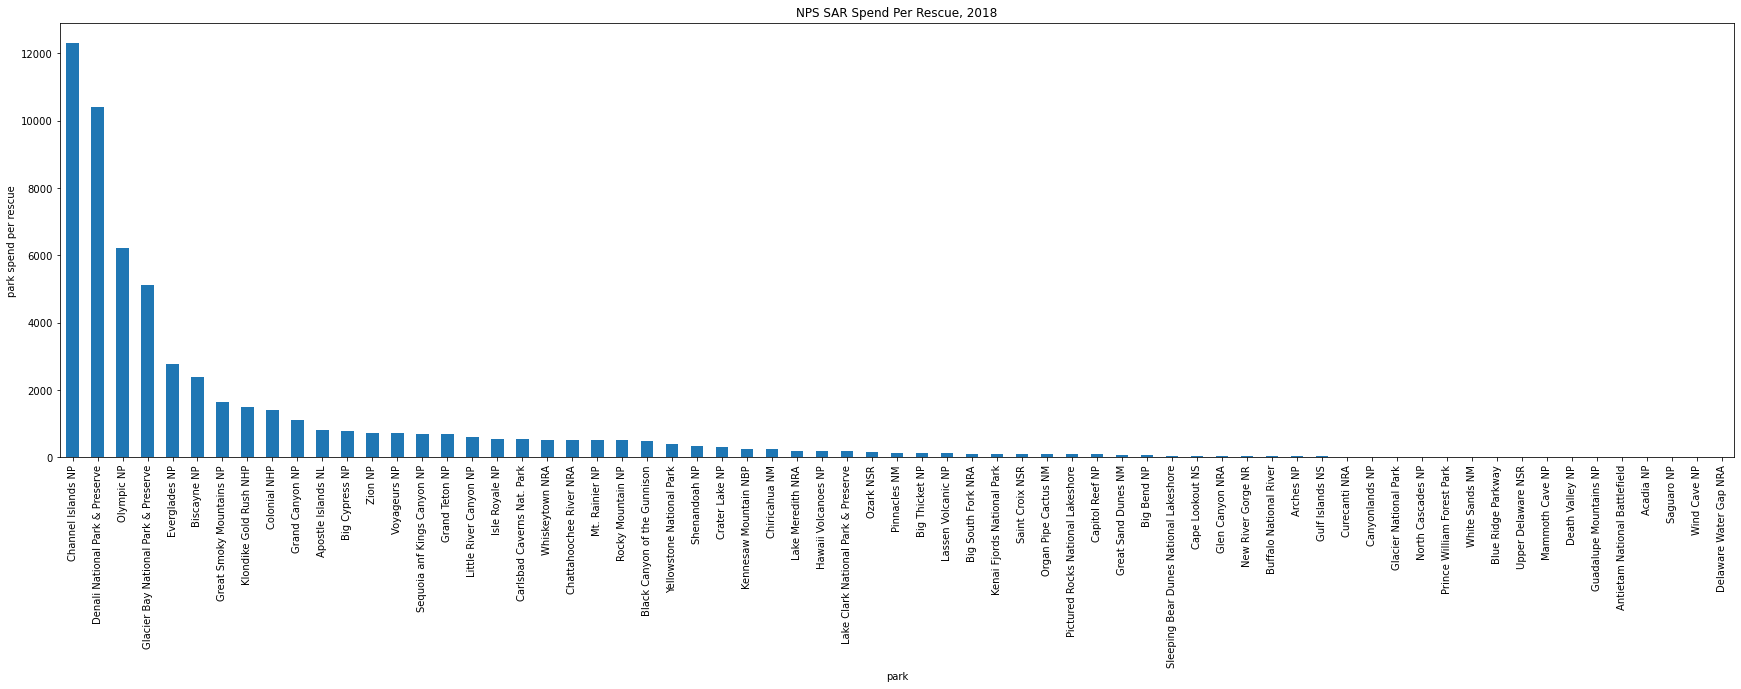

In [94]:
df_combined_spend_sar.groupby('park')['spend_per_sar'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                              xlabel = 'park',
                                                                                              ylabel = 'park spend per rescue',
                                                                                              title = 'NPS SAR Spend Per Rescue, 2018',
                                                                                              figsize = (30,8));

#### Looking at some stats by region

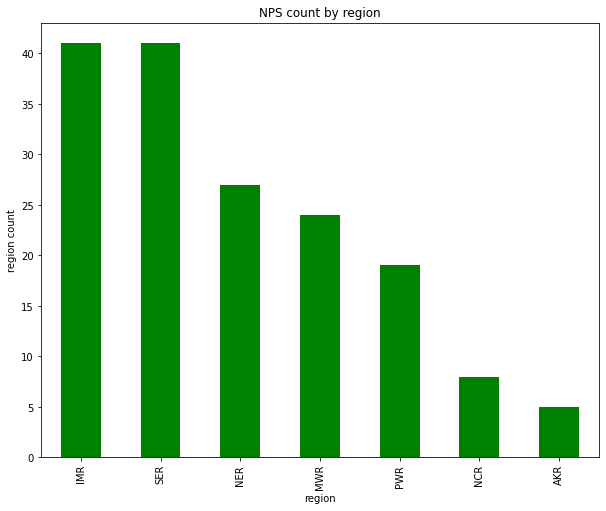

In [107]:
df_combined['region'].value_counts().plot(kind = 'bar',
                                            xlabel = 'region',
                                            ylabel = 'region count',
                                            title = 'NPS count by region',
                                            figsize = (10,8),
                                            color = 'green');

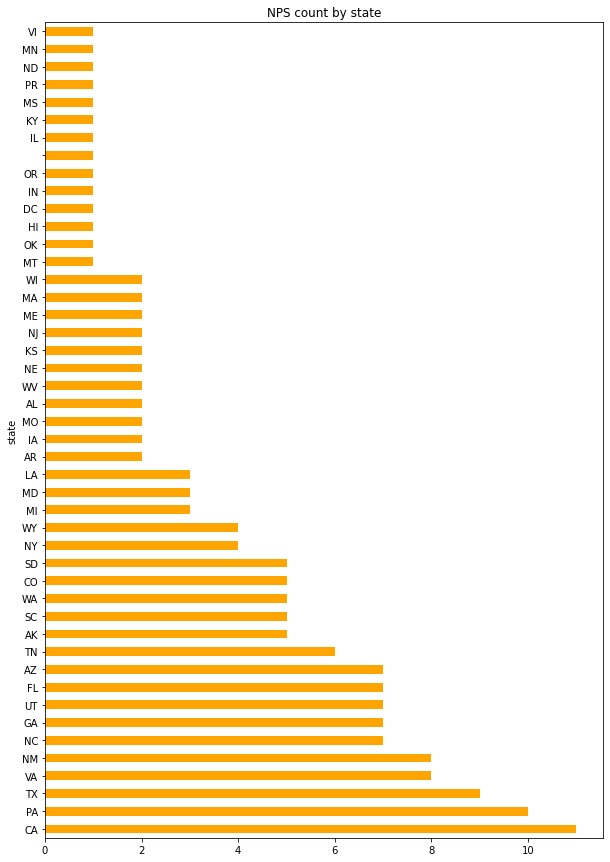

In [112]:
df_combined['state'].value_counts().plot(kind = 'barh',
                                            xlabel = 'state',
                                            ylabel = 'state count',
                                            title = 'NPS count by state',
                                            figsize = (10,15),
                                            color = 'orange');

#### Let's plot these on a map. Chloropleth time!

Thankfully, the dataset provides latitude and longitude.

In [99]:
df_combined[['park','state','region','latitude','longitude','total_costs','total_visits', 'total', 'fatality']]

,park,state,region,latitude,longitude,total_costs,total_visits,total,fatality
0,Olympic NP,WA,PWR,47.794600,-123.618300,397683.74,3833266.0,64.0,5.0
1,Acadia NP,ME,NER,44.350700,-68.244100,217.11,3584675.0,37.0,0.0
2,Agate Fossil Beds NM,NE,MWR,42.421500,-103.744000,0.00,16238.0,0.0,0.0
3,All Fish and Wildlife,,NCR,38.876403,-77.033566,NaN,NaN,NaN,NaN
4,Allegheny Portage Railroad NHS,PA,NER,40.446800,-78.531900,0.00,189227.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
160,Obed Wild &amp; Scenic River,TN,SER,36.084600,-84.722400,0.00,NaN,6.0,0.0
161,Parashant NM,AZ,PWR,36.284000,-113.611300,0.00,NaN,4.0,0.0
162,Pictured Rocks National Lakeshore,MI,MWR,46.513000,-86.466700,1180.00,NaN,13.0,1.0
163,San Juan NHS,WA,PWR,48.462100,-123.005000,0.00,910405.0,0.0,0.0


#### We can use plotly to plot them on a map.

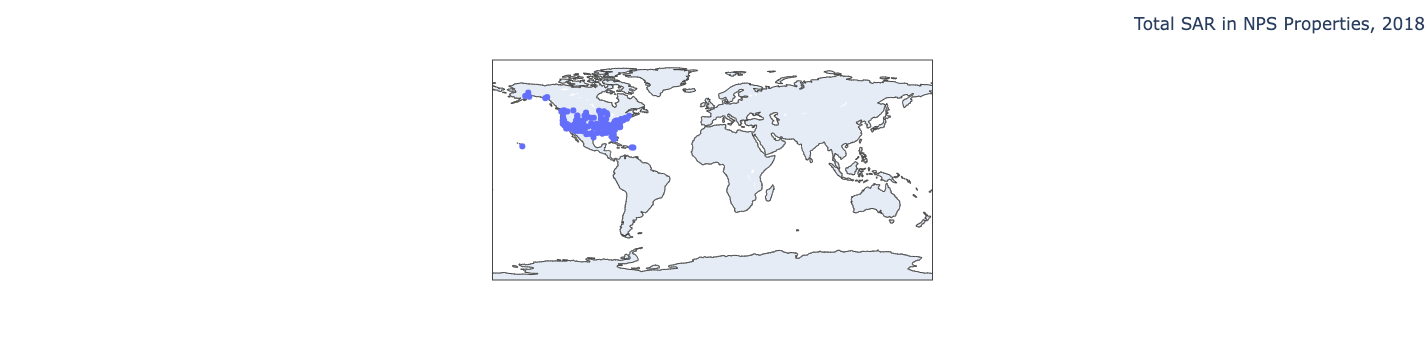

In [211]:
fig = px.scatter_geo(df_combined,lat='latitude',lon='longitude', hover_name='park', hover_data = ['total', 'fatality', 'ill_or_injured', 'not_ill_or_injured', 'unfounded'])
fig.update_layout(title = 'Total SAR in NPS Properties, 2018', title_x=1)
fig.show()